# **CATASTRO UNET**

El notebook está desarrollado para descargar el github de catastro DNP y basado en los scripts contenidos configurar todo el environment de python.

Con el fin de obtener un mejor rendimiento se aconseja usar la GPU que provee google colab y que se puede gestionar en la opción "cambiar entorno de ejecución" en el menú "Entorno de ejecución".

Hay 3 opciones para correr el notebook:

- Seguir el paso 1A y correr el notebook tal como está y usar una *imagen de ejemplo* que está contenida el git.

- *Subir una imagen* en el paso 1B y hacer el ejercicio sobre esta imagen.

- *Imagen desde google drive* en el paso 1C y hacer el ejercicio sobre esta imagen. Se debe copiar el link desde google drive asegurandose que se han quitado las restricciones para compartir el archuvo

**NOTA IMPORTANTE:** Asegurarse que la imagen subida o que se tenga en google drive sea una imagen RGB. Los resultados de la segmentación están directamente relacionados a la calidad de la resolución de la imagen.

In [ ]:
#@title Unet workflow
from IPython.display import display, HTML

# Replace 'url_to_your.gif' with the actual URL of your GIF
gif_url = 'https://www.ifpenergiesnouvelles.com/sites/ifpen.fr/files/inline-images/NEWSROOM/Lettre%20Science%40IFPEN/Science%2045/VA-06-Segmentation.gif'

# Define the width you want for the displayed GIF
width = 1200  # Adjust this value as needed

# Create HTML code to display the GIF with the specified width
html_code = f'<img src="{gif_url}" width="{width}"/>'

# Display the HTML code
display(HTML(html_code))


# **1. ENVIRONMENT**

In [ ]:
#@title Configurar el ambiente de python basado en el github de catastrodnp/DeteccionElementosCatastro_Unet (Reiniciar entorno luego de ejecutar esta celda)
%%time
!git clone https://github.com/catastrodnp/DeteccionElementosCatastro_Unet
%cd /content/DeteccionElementosCatastro_Unet
!pip install --user -r requirements_colab.txt

**NOTA:** Antes de seguir reiniciar el Entorno de ejecuciòn



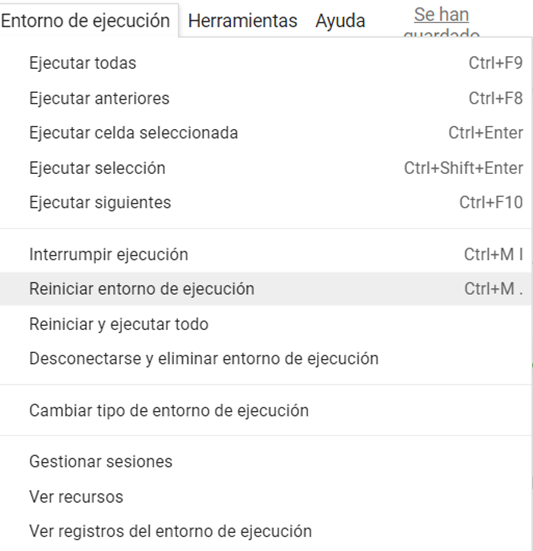

# **1A. Usar imagen de ejemplo**

In [ ]:
#@title Visualizar imagen de ejemplo (Topaga, Boyacá)
import os,glob,leafmap

ori_fol='/content/DeteccionElementosCatastro_Unet/data_example'
originals=glob.glob(ori_fol+'/*.tif')
original=originals[0]

m0 = leafmap.Map()
m0.add_raster(original, layer_name="Example RGB")
m0

# **1B. Subir imagen (opcional)**

In [ ]:
#@title Subir imagen desde el pc
%cd /content/DeteccionElementosCatastro_Unet

import delete_folders_with_prefix as dfwp
from google.colab import files
import leafmap
import os,glob,shutil

#Borrar información previa
directory='/content'
prefix='predict'
img_fol='/content/images'

if os.path.exists(img_fol):
        shutil.rmtree('/content/images')

dfwp.delete_folders_with_prefix(directory, prefix)

# Use the files.upload() function to upload files
uploaded = files.upload()

# Print the uploaded file names
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


ori_fol='/content/DeteccionElementosCatastro_Unet'
originals=glob.glob(ori_fol+'/*.tif')
original=originals[0]

m1 = leafmap.Map()
m1.add_raster(original, layer_name="Example RGB")
m1

# **1C. Imagen desde Google Drive (opcional)**

Ejemplo link desde google drive

https://drive.google.com/file/d/1DKGranl4rtCCj345PRVvqsEHhpYGoibl/view?usp=sharing

In [ ]:
#@title Imagen desde Drive (Dar acceso público a la imagen y usar el vínculo )
import os,glob,leafmap
#https://drive.google.com/file/d/1DKGranl4rtCCj345PRVvqsEHhpYGoibl/view?usp=sharing
drive_tif=input()
drive_id=drive_tif.split('/',6)[-2]
drive_id

ori_fol='/content/drive'

if not os.path.exists(ori_fol):
        os.makedirs(ori_fol)

drive_img=ori_fol+'/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled.tif'
!gdown --id $drive_id --o $drive_img

originals=glob.glob(ori_fol+'/*.tif')
original=originals[0]

m2 = leafmap.Map()
m2.add_raster(original, layer_name="Example RGB")
m2


# **2. CROP IMAGES**

In [ ]:
#@title Recortar las imágenes (Es necesario recortas las imágenes para poder procesarlas en el algoritmo)
%%time

%cd /content/DeteccionElementosCatastro_Unet

import crop_images_gdal as ci
#import crop_images as ci



ci.crop(ORI_PATH=ori_fol,
        #SIZE=size,
        CROP_PATH='/content/images',
        #EXT='tif'
        )

/content/DeteccionElementosCatastro_Unet


  0%|          | 0/1 [00:00<?, ?it/s]

(2500, 2500, 4)
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_0_0_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_100_1_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_200_2_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_300_3_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_400_4_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_500_5_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_600_6_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_700_7_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_800_8_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_900_9_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_1000_10_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_0_1100_11_100_100_1.ti

100%|██████████| 1/1 [00:11<00:00, 11.86s/it]

/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_2400_2200_622_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_2400_2300_623_100_100_1.tif
/content/images/Servicio_5200_0e1f_3B_AnalyticMS_rgb_scaled_2400_2400_624_100_100_1.tif
CPU times: user 6.49 s, sys: 664 ms, total: 7.16 s
Wall time: 11.9 s


# **3. PREDICT**

In [ ]:
#@title Escoger el objeto que se quiere segmentar y ejecutar
%%time
#segmentar = 'construccion' #@param ["via_urb","construccion","cerca","muro","manzana","remoción"]
segmentar = 'construccion' #@param ["via_urb","construccion","cerca","muro"]

#Gestionar archivos zip: pesos de UNet
import zipfile
import glob

split_zip_files = glob.glob('/content/DeteccionElementosCatastro_Unet/weights/'+str(segmentar)+'*.zip.0*')
split_zip_files.sort()

output_zip_path = '/content/{}.zip'.format(str(segmentar))
with open(output_zip_path, 'wb') as output_zip:
    for split_file in split_zip_files:
        with open(split_file, 'rb') as input_part:
            output_zip.write(input_part.read())

#Extrar contenido del nuevo archivo zip
with zipfile.ZipFile(output_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

#PREDICCIÓN
%cd '/content/DeteccionElementosCatastro_Unet'

import os
import predict as pr

test_fol='/content'
pred_fol='/content/predict_{}/'.format(segmentar)

if not os.path.exists(pred_fol):
        os.makedirs(pred_fol)

list_wei=glob.glob('/content/*{}*.pth'.format(segmentar))
wei=list_wei[0]

pr.predict(CLASS_PREDICT = ['background', segmentar],
           #SIZE=size, CLASS_RGB=[[0, 0, 0], [255, 255, 255]],
            CROP_PATH=test_fol,ENCODER = 'vgg16', ENCODER_WEIGHTS = 'imagenet', ACTIVATION = 'sigmoid',
            WEIGHT=wei, PRED_PATH = pred_fol, CLASS_INDEX=segmentar, clean_crop=False)

/content/DeteccionElementosCatastro_Unet


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 245MB/s]


Loaded UNet model from this run.


625it [01:58,  5.29it/s]

CPU times: user 1min 46s, sys: 3.79 s, total: 1min 50s
Wall time: 2min 15s


# **4. BIG MASK**

In [ ]:
#@title Obtener la máscara en el tamaño original
%%time
import big_mask as bi
from google.colab.patches import cv2_imshow
import cv2

big_fol='/content/big_mask_{}/'.format(segmentar)

if not os.path.exists(big_fol):
        os.makedirs(big_fol)

bi.big_img_join(PRED_BIG=big_fol,
                ORI_PATH=ori_fol,
                PRED_PATH=pred_fol,
                #h=size, w=size
                )

big_results=glob.glob(big_fol+'/*.tif')
big_result=big_results[0]

mask = cv2.imread(big_result, cv2.IMREAD_UNCHANGED)
mask=cv2.resize(mask, (480, 270))
cv2_imshow(mask)

# **5. GEOREFERENCE**

In [ ]:
#@title Obtener la máscara georeferenciada (y descargar resultado)
#%%time
import georeference as geo
from google.colab import files

geo_fol='/content/geo_{}/'.format(segmentar)

if not os.path.exists(geo_fol):
        os.makedirs(geo_fol)

ori_tif = glob.glob(ori_fol+'/*.tif')[0]
big_tif = glob.glob(big_fol+'/*.tif')[0]
geo_tif = geo_fol+big_tif.split('/')[-1]

geo.georeference(big_tif,ori_tif,geo_tif)

Proceso de georreferenciación completado.


# **6. SHAPEFILE**

In [ ]:
#@title Obtener el shapefile con la segmentación de los elementos
%%time
import raster_to_shp as rs
from google.colab import files

geo_results=glob.glob(geo_fol+'/*.tif')
geo_result=geo_results[0]
shp_result=geo_result.replace('.tif','.shp')

rs.raster_to_shapefile(input_raster=geo_result,
                       output_shapefile=shp_result)

CPU times: user 466 ms, sys: 39.2 ms, total: 505 ms
Wall time: 850 ms


# **7. POST PROCESAMIENTO: REGULARIZACIÓN**

In [ ]:
#@title Obtener el shapefile regularizado (y descargar resultados)
import shp_regularize as sr

simp_fac=float(input('Factor reg - ingresar numoero de 0 a 1: '))
topol=True

shp_in=shp_result
shp_out=shp_in.replace('.shp','_simp{}_morf{}_reg.shp'.format(str(simp_fac).replace('.',''),topol))

sr.shp_regularize(shp_in,shp_out,simp_fac,topol)

#### DOWNLOAD RESULTS
zip_shapes = '/content/resultados_{}_simp{}_morf{}.zip'.format(segmentar,str(simp_fac).replace('.',''),topol)

# Create a ZipFile object in write mode
with zipfile.ZipFile(zip_shapes, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Walk through the folder and add each file to the zip archive
    for foldername, subfolders, filenames in os.walk(geo_fol):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            arcname = os.path.relpath(file_path, geo_fol)  # Use relative path as the archive name
            zipf.write(file_path, arcname)


files.download(zip_shapes)

Factor reg - ingresar numoero de 0 a 1: 0.4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **8. VISUALIZACIÓN DE LOS RESULTADOS**

In [ ]:
#@title Visualizar el resultado final en un mapa interactivo
%%time
import leafmap

import os

def get_shp_files(root_folder):
    shp_files = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith(".shp"):
                shp_files.append(os.path.join(root, file))
    return shp_files

folder_path = "/content"
shp_files_list = get_shp_files(folder_path)

colors=['red','blue','green','silver','yellow','orange','black','brown','purple']

m_results = leafmap.Map()
m_results.add_raster(original, layer_name="Imagen Original")
for i,shp_file_path in enumerate(shp_files_list):
    layer=shp_file_path.split('/')[-1]
    m_results.add_vector(shp_file_path, layer_name=layer,
                         style={'color':colors[i]} )

m_results

**NOTA:** Para realizar la detección de otro elemento regresar al paso 3, seleccionar el elemento y ejecutar desde el paso 3.